# Airbnb Price Predictor - EDA Notebook
This notebook performs basic exploratory data analysis on the NYC Airbnb dataset.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting
sns.set(style='whitegrid')

In [45]:
# Load the dataset
df = pd.read_csv('../data/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [46]:
# Basic dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [47]:
# Summary statistics
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


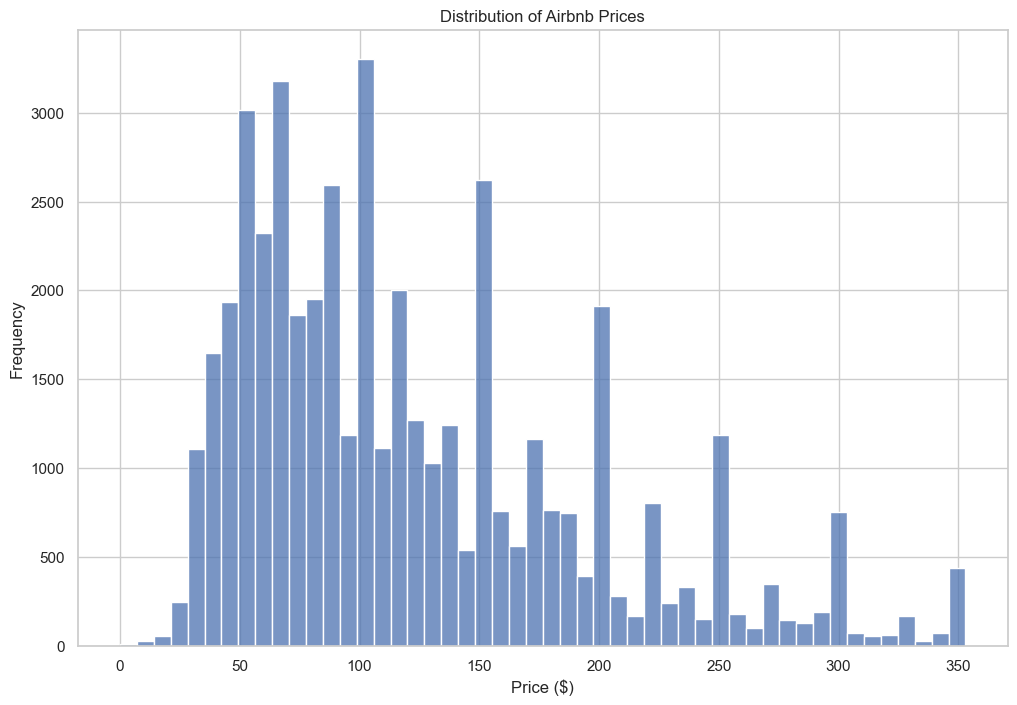

In [48]:
# Distribution of price (capped at 95th percentile for clarity)
sns.histplot(df[df['price'] < df['price'].quantile(0.95)]['price'], bins=50)
plt.title('Distribution of Airbnb Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

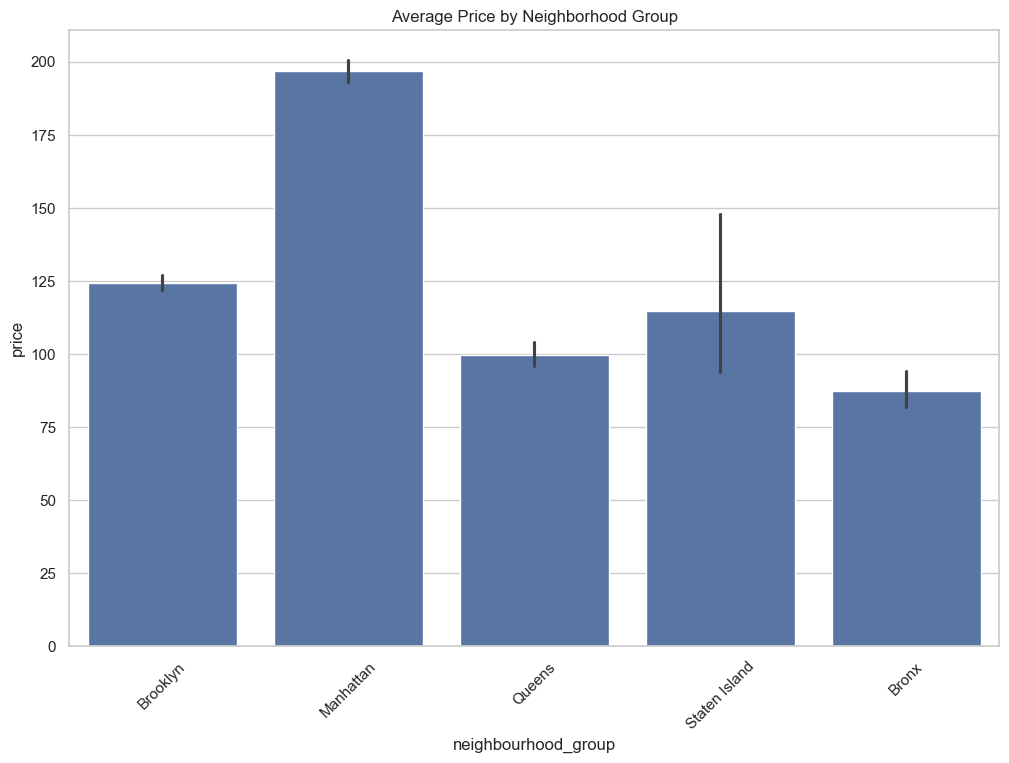

In [49]:
# Average price by neighborhood group
sns.barplot(data=df, x='neighbourhood_group', y='price', estimator=lambda x: x.mean())
plt.title('Average Price by Neighborhood Group')
plt.xticks(rotation=45)
plt.show()

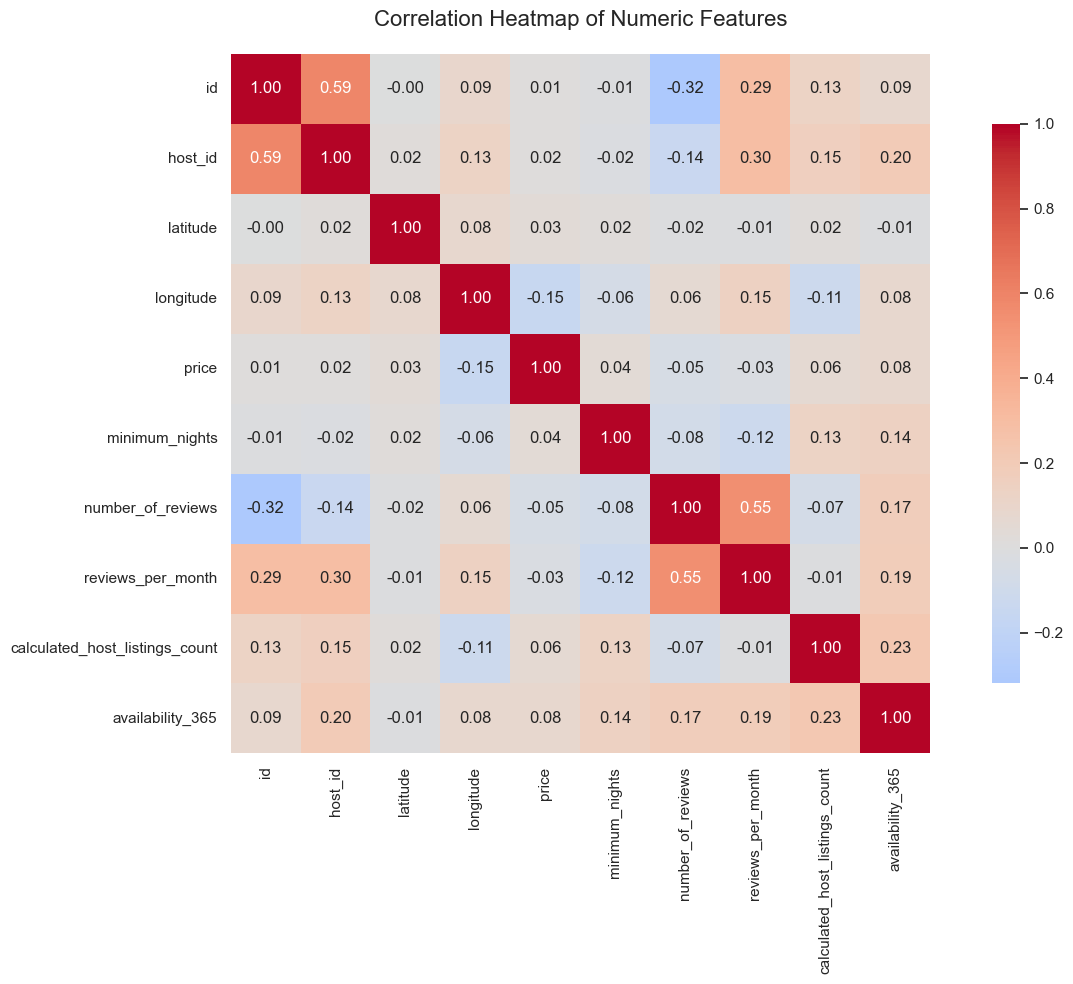

In [50]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.figure(figsize=(14, 10))
# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

sns.heatmap(correlation_matrix, 
           annot=True, 
           cmap='coolwarm', 
           center=0,
           square=True,
           fmt='.2f',
           cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap of Numeric Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

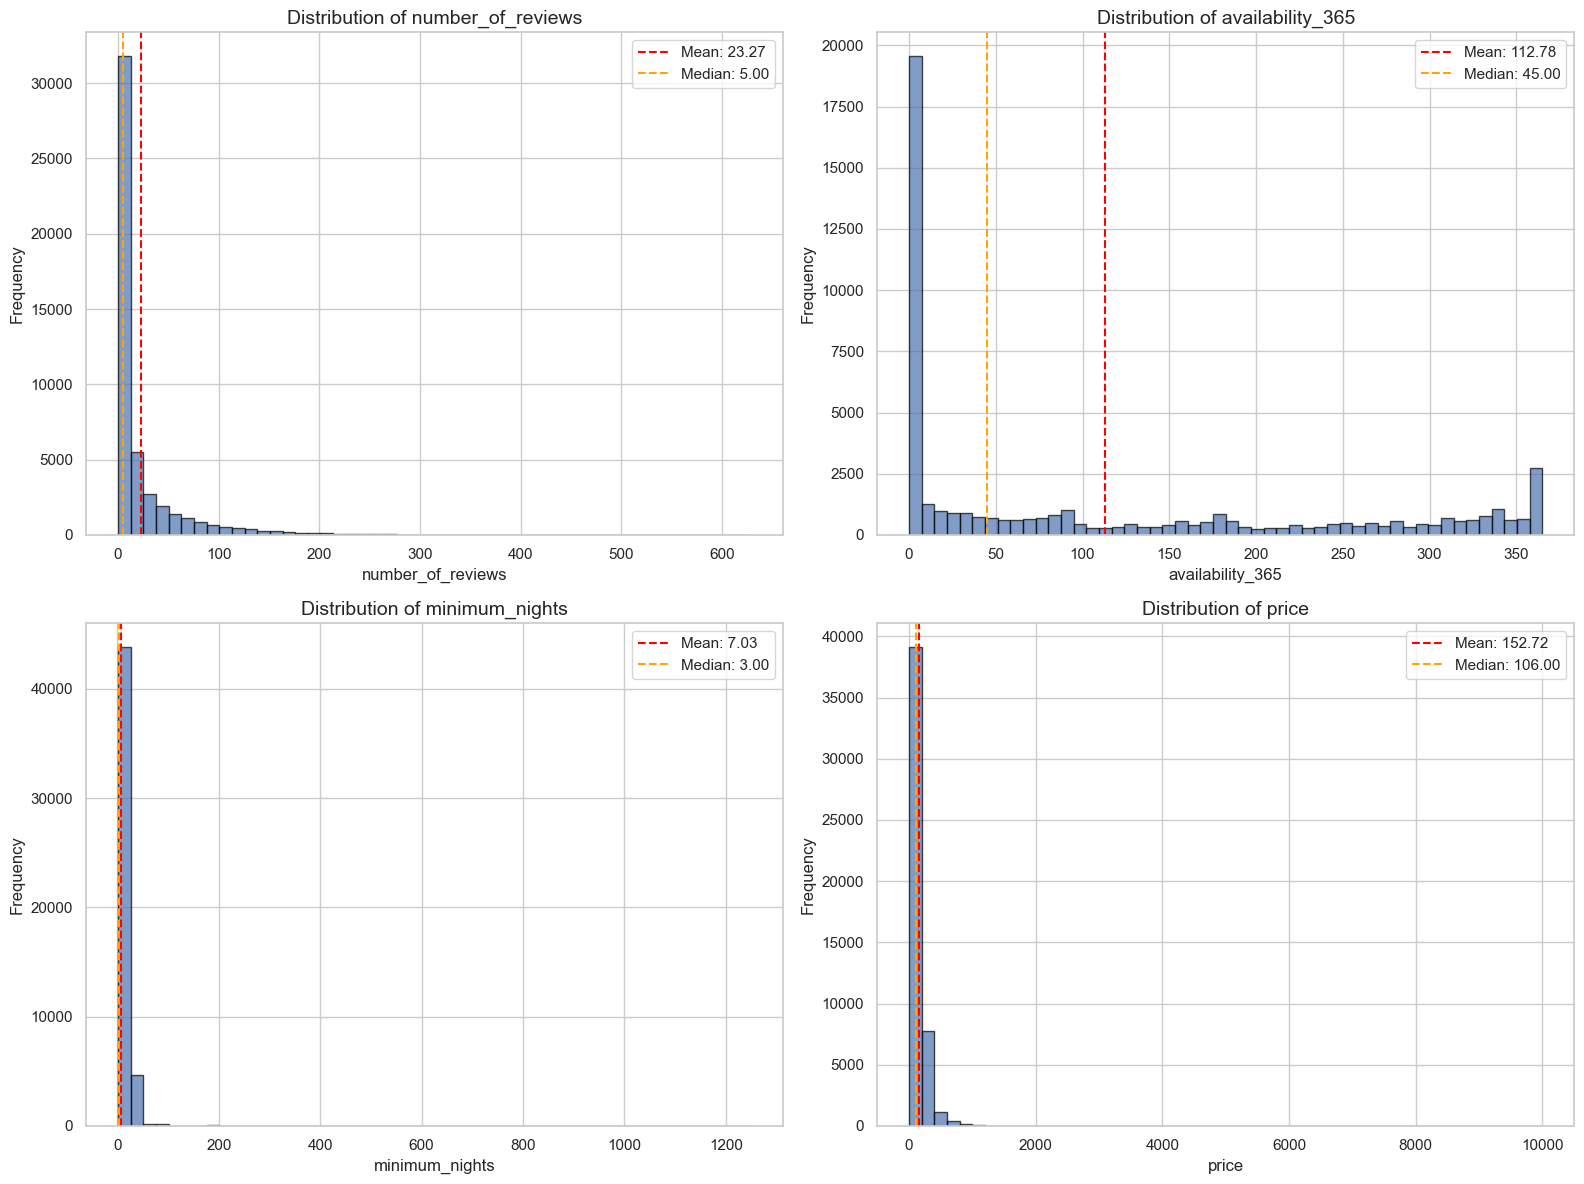

In [51]:
numeric_features = ['number_of_reviews', 'availability_365', 'minimum_nights', 'price']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, feature in enumerate(numeric_features[:4]):
    if feature in df.columns:
        # Histogram with KDE
        axes[i].hist(df[feature].dropna(), bins=50, alpha=0.7, edgecolor='black')
        axes[i].set_title(f'Distribution of {feature}', fontsize=14)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')
        
        # Add mean and median lines
        mean_val = df[feature].mean()
        median_val = df[feature].median()
        axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
        axes[i].axvline(median_val, color='orange', linestyle='--', label=f'Median: {median_val:.2f}')
        axes[i].legend()

plt.tight_layout()
plt.show()

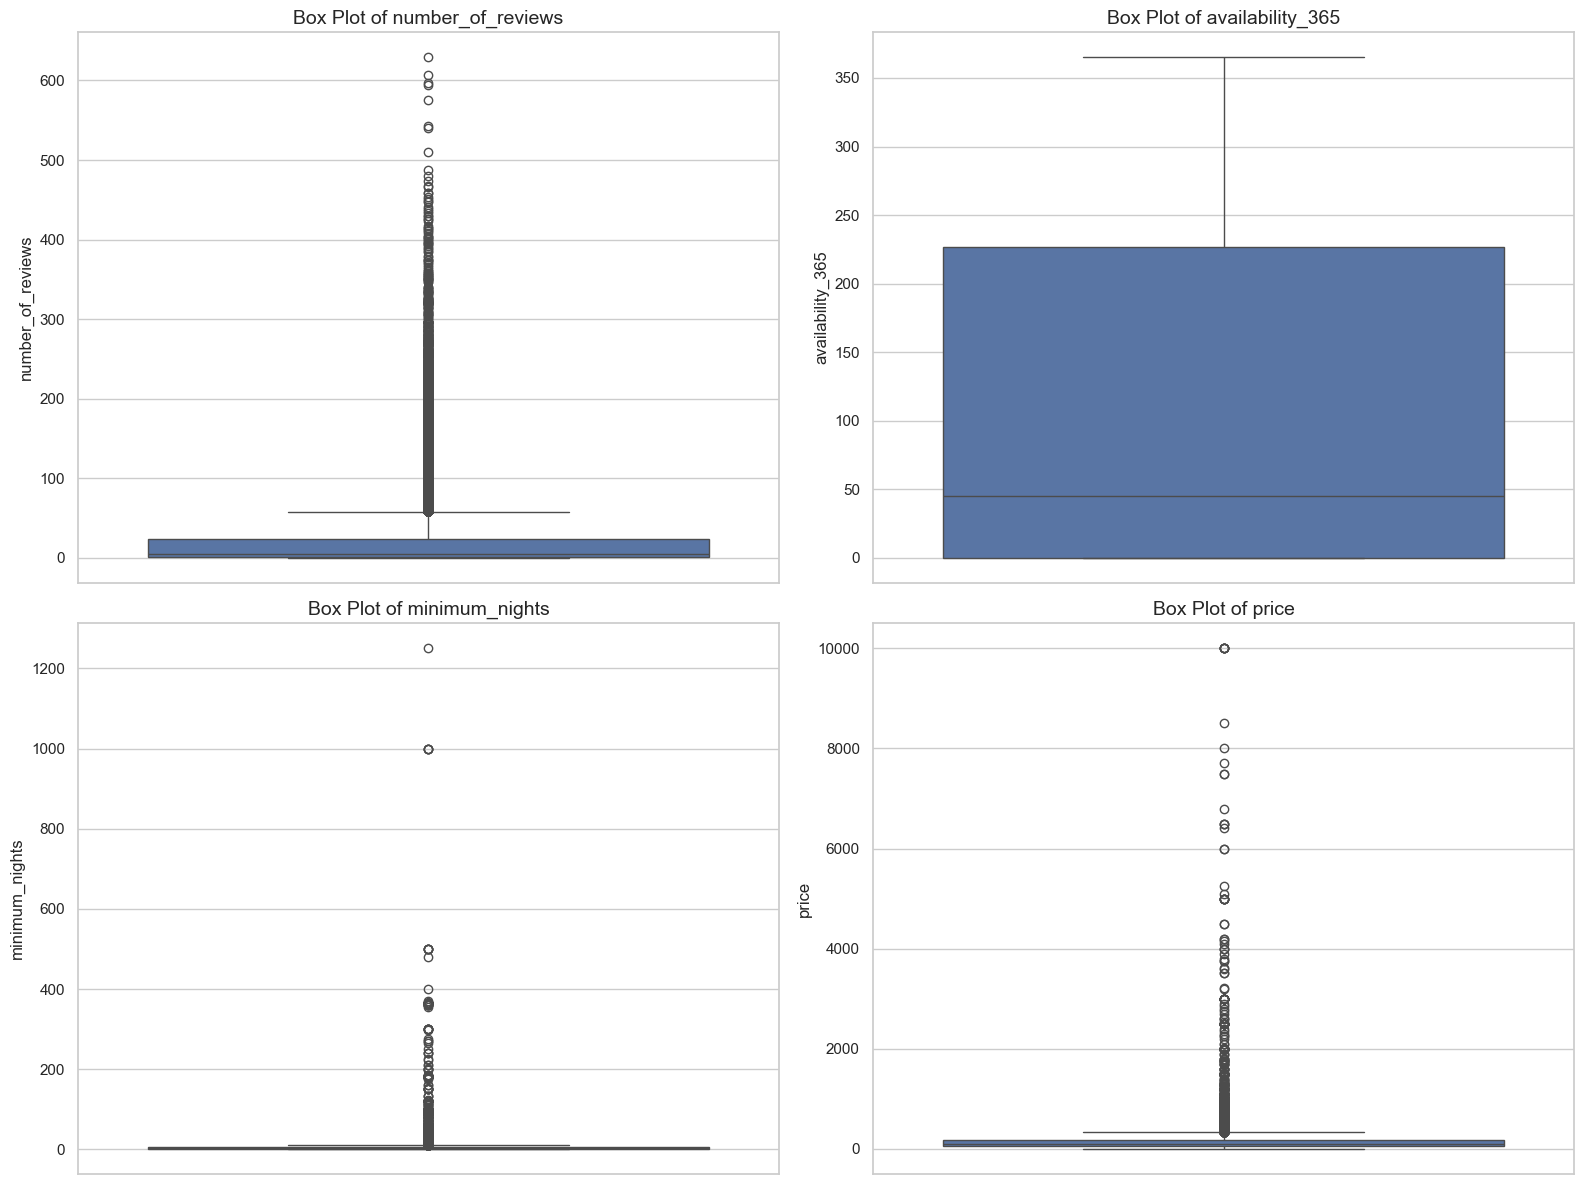

In [52]:
# Box plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, feature in enumerate(numeric_features[:4]):
    if feature in df.columns:
        sns.boxplot(data=df, y=feature, ax=axes[i])
        axes[i].set_title(f'Box Plot of {feature}', fontsize=14)

plt.tight_layout()
plt.show()

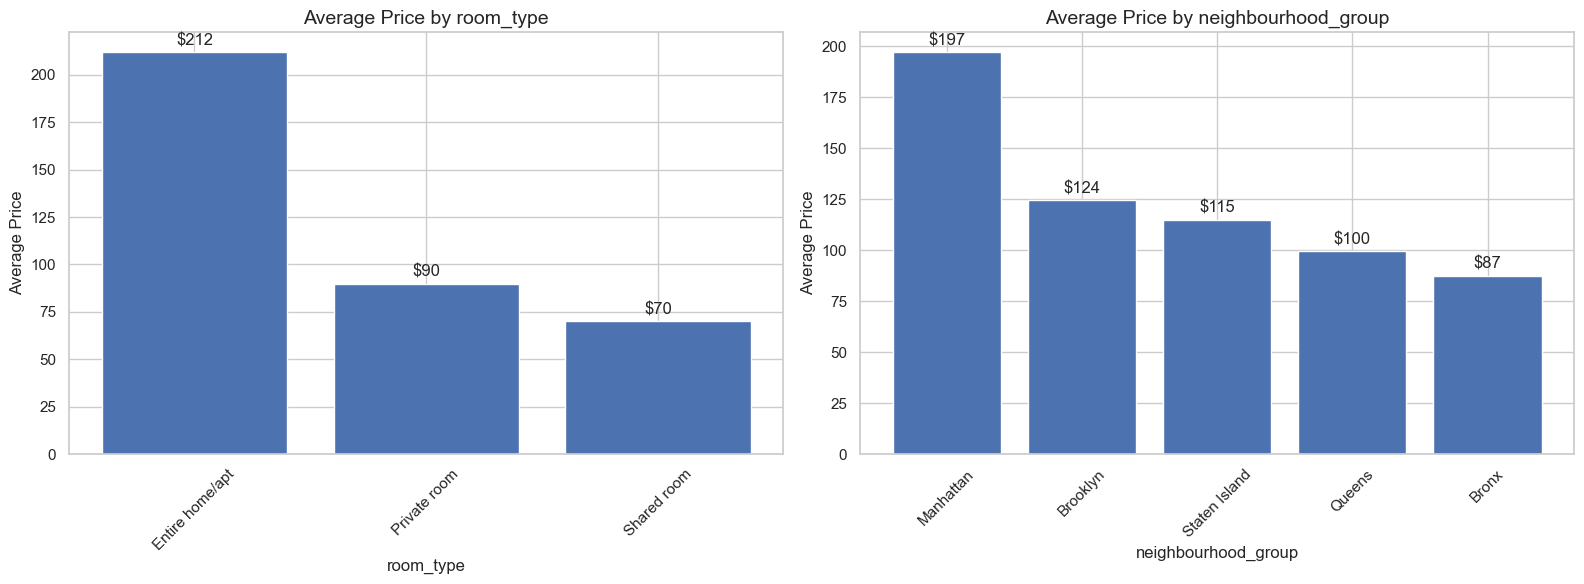

In [54]:
# Average price by categorical features
categorical_features = ['room_type', 'neighbourhood_group']

if 'price' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    for i, cat_feature in enumerate(categorical_features):
        if cat_feature in df.columns:
            # Average price by category
            avg_price = df.groupby(cat_feature)['price'].mean().sort_values(ascending=False)
            
            axes[i].bar(range(len(avg_price)), avg_price.values)
            axes[i].set_title(f'Average Price by {cat_feature}', fontsize=14)
            axes[i].set_xlabel(cat_feature)
            axes[i].set_ylabel('Average Price')
            axes[i].set_xticks(range(len(avg_price)))
            axes[i].set_xticklabels(avg_price.index, rotation=45)
            
            # Add value labels on bars
            for j, v in enumerate(avg_price.values):
                axes[i].text(j, v + max(avg_price.values) * 0.01, f'${v:.0f}', 
                           ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

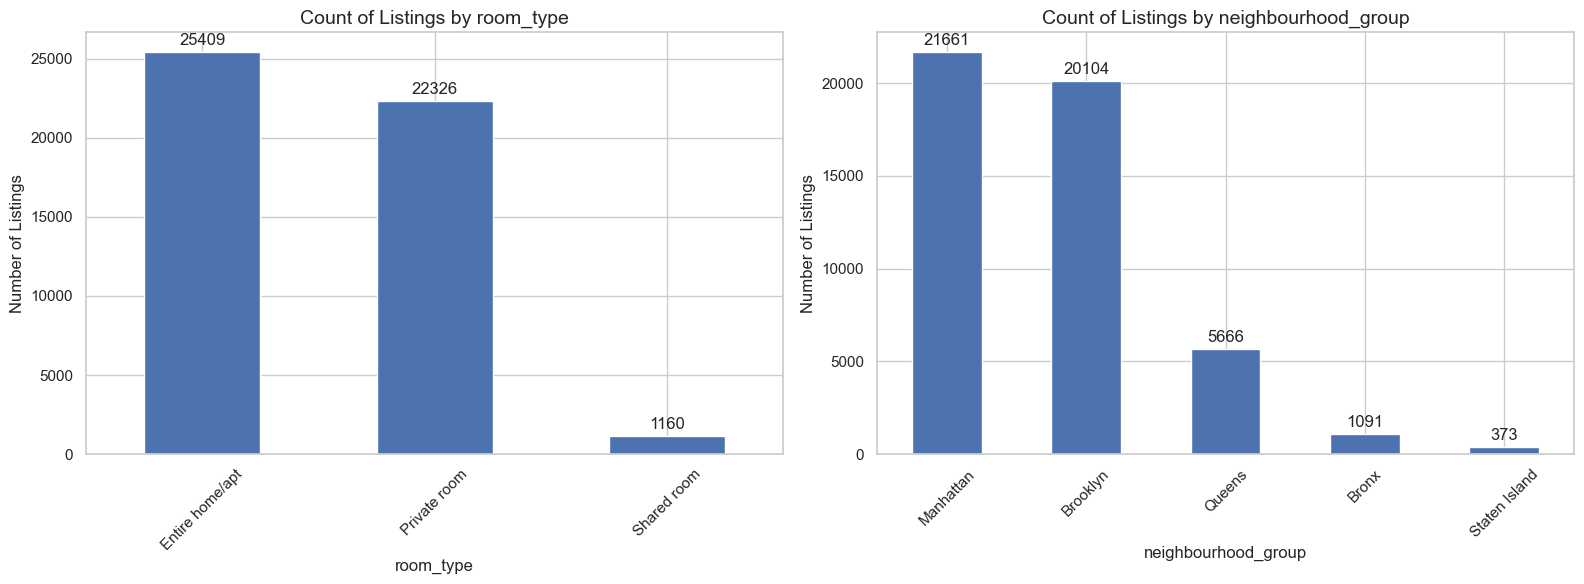

In [55]:
# Count plots for categorical features
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for i, cat_feature in enumerate(categorical_features):
    if cat_feature in df.columns:
        # Count plot
        df[cat_feature].value_counts().plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Count of Listings by {cat_feature}', fontsize=14)
        axes[i].set_xlabel(cat_feature)
        axes[i].set_ylabel('Number of Listings')
        axes[i].tick_params(axis='x', rotation=45)
        
        # Add value labels on bars
        for j, v in enumerate(df[cat_feature].value_counts().values):
            axes[i].text(j, v + max(df[cat_feature].value_counts().values) * 0.01, 
                        str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

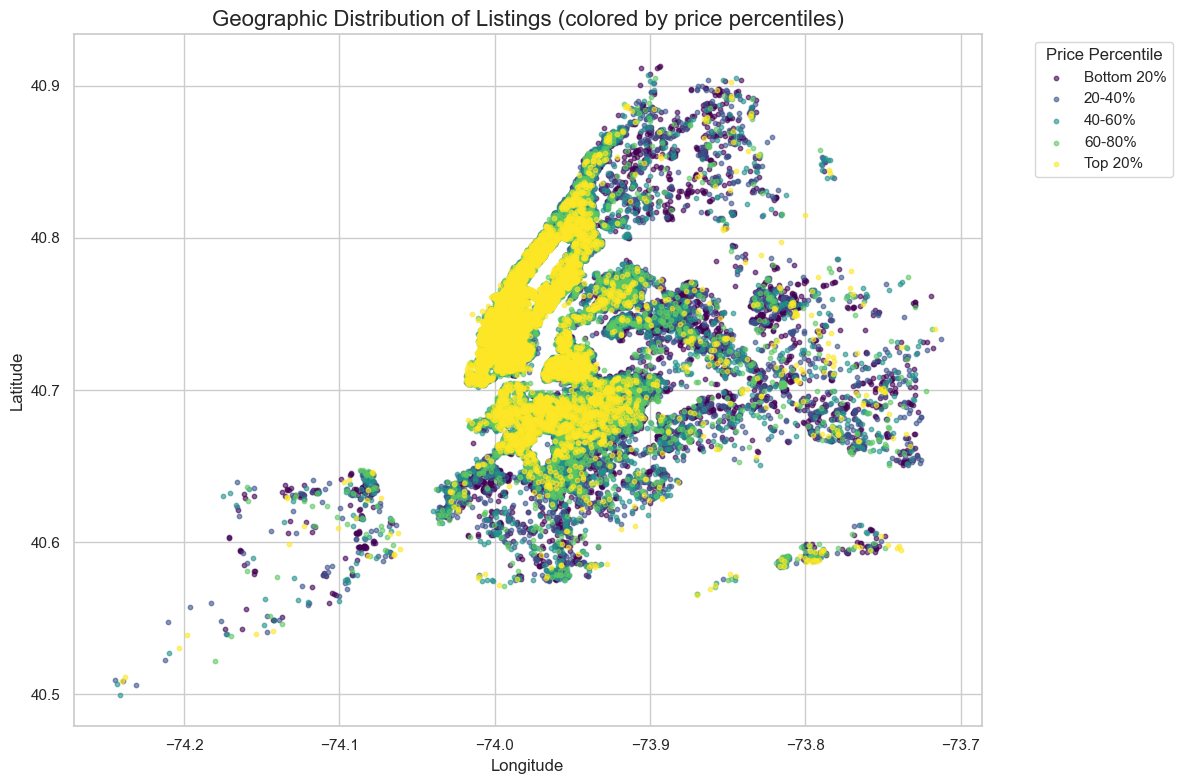

In [60]:
# Geographic analysis (if latitude/longitude available)
plt.figure(figsize=(12, 8))
price_percentiles = pd.qcut(df['price'], q=5, labels=['Bottom 20%', '20-40%', '40-60%', '60-80%', 'Top 20%'])
colors = ['#440154', '#3b528b', '#21918c', '#5dc863', '#fde725']  # viridis colors

for i, (category, color) in enumerate(zip(['Bottom 20%', '20-40%', '40-60%', '60-80%', 'Top 20%'], colors)):
    mask = price_percentiles == category
    plt.scatter(df.loc[mask, 'longitude'], df.loc[mask, 'latitude'], 
               c=color, label=category, alpha=0.6, s=10)

plt.legend(title='Price Percentile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Geographic Distribution of Listings (colored by price percentiles)', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()